In [ ]:
# Install Package
%pip install twint
%pip install nest_asyncio

# # Fix Issue with twint 20.1.20 from pip --> upgrade to 20.1.21 directly from git
%pip install --upgrade -e git+https://github.com/twintproject/twint.git@origin/master#egg=twint

# Nomor 1

<b>NOMOR 1</b>. Lakukan scrapping data twitter pada akun College Menfest (@collegemenfess) sejumlah 5000
twit. Anda dapat menggunakan library Twint atau API resmi dari twitter.

In [ ]:
# Memanggil Libary Twint dan Nest Asychio, lalu melakukan instanisiasi nest asyncio

import twint
import nest_asyncio
nest_asyncio.apply()

c = twint.Config()
#scrapping dengan memasukan username twitter, masukkan tanggal sejak kapan dan sampai kapan datanya diambil, lalu masukkan limit datanya.
c.Username = "collegemenfess"
c.Since = "2022-12-04"
c.Until = "2022-12-11"
c.Limit = 5000
c.Store_csv = True
#setelah dirun akan ada data csv-nya
c.Output = "colle_scrap.csv"
twint.run.Search(c)

In [ ]:

import pandas as pd
df = pd.read_csv('colle_scrap.csv')
df['tweet'].head()

0         [cm] bisa ga sih skripsi tuh diilangin aja 🥲
1    [cm] tolong infonya ya makasih guys  https://t...
2    [cm] gaiss ada yg tau cara nyari jumlah atau d...
3    Besok aku praktik pertama kalinya di rumah sak...
4    ayooo bantu sender nyetok bahan2!! tia [cm]  h...
Name: tweet, dtype: object

In [ ]:

#cekinfo 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               5000 non-null   int64  
 1   conversation_id  5000 non-null   int64  
 2   created_at       5000 non-null   object 
 3   date             5000 non-null   object 
 4   time             5000 non-null   object 
 5   timezone         5000 non-null   int64  
 6   user_id          5000 non-null   int64  
 7   username         5000 non-null   object 
 8   name             5000 non-null   object 
 9   place            0 non-null      float64
 10  tweet            5000 non-null   object 
 11  language         5000 non-null   object 
 12  mentions         5000 non-null   object 
 13  urls             5000 non-null   object 
 14  photos           5000 non-null   object 
 15  replies_count    5000 non-null   int64  
 16  retweets_count   5000 non-null   int64  
 17  likes_count   

In [ ]:

df['tweet'].head()

0         [cm] bisa ga sih skripsi tuh diilangin aja 🥲
1    [cm] tolong infonya ya makasih guys  https://t...
2    [cm] gaiss ada yg tau cara nyari jumlah atau d...
3    Besok aku praktik pertama kalinya di rumah sak...
4    ayooo bantu sender nyetok bahan2!! tia [cm]  h...
Name: tweet, dtype: object

<h3>Import Libary</h3>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import time
import string
import warnings

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

warnings.filterwarnings("ignore", category=DeprecationWarning)

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("indonesian"))

%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is alr

In [ ]:

#menghapus pattern
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [ ]:

#setelah dirun maka akan terfilter kalimat yang ada tanda @ dan akan masuk pada tidy tweets
df['tidy_tweets'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*: | *RT*")
df[['tweet', 'tidy_tweets']].head(10)

,tweet,tidy_tweets
0,[cm] bisa ga sih skripsi tuh diilangin aja 🥲,[cm] bisa ga sih skripsi tuh diilangin aja 🥲
1,[cm] tolong infonya ya makasih guys https://t...,[cm] tolong infonya ya makasih guys https://t...
2,[cm] gaiss ada yg tau cara nyari jumlah atau d...,[cm] gaiss ada yg tau cara nyari jumlah atau d...
3,Besok aku praktik pertama kalinya di rumah sak...,Besok aku praktik pertama kalinya di rumah sak...
4,ayooo bantu sender nyetok bahan2!! tia [cm] h...,ayooo bantu sender nyetok bahan2!! tia [cm] h...
5,[cm] spek laptop gini buat anak arsi cukup gak...,[cm] spek laptop gini buat anak arsi cukup gak...
6,[cm] kira2 sopan gak ya ngechat dosbing hari i...,[cm] kira2 sopan gak ya ngechat dosbing hari i...
7,"Siapa yang pernah di posisi ini, ada solusi ga...","Siapa yang pernah di posisi ini, ada solusi ga..."
8,[Cm] ada mahasiswa magister akuntansi/ekonomi ...,[Cm] ada mahasiswa magister akuntansi/ekonomi ...
9,[cm] Gais kampus pendidikan yg terkenal di Ind...,[cm] Gais kampus pendidikan yg terkenal di Ind...


<h3>Menghapus Kalimat Http</h3>

In [ ]:

#untuk menghilangkan kalimat yang berisi http
cleaned_tweets = []
for index, row in df.iterrows():
    words_without_links = [word for word in row.tidy_tweets.split() if 'http' not in word]
    cleaned_tweets.append(' '.join(words_without_links))

df['tidy_tweets'] = cleaned_tweets
df[['tweet', 'tidy_tweets']].head(10)

,tweet,tidy_tweets
0,[cm] bisa ga sih skripsi tuh diilangin aja 🥲,[cm] bisa ga sih skripsi tuh diilangin aja 🥲
1,[cm] tolong infonya ya makasih guys https://t...,[cm] tolong infonya ya makasih guys
2,[cm] gaiss ada yg tau cara nyari jumlah atau d...,[cm] gaiss ada yg tau cara nyari jumlah atau d...
3,Besok aku praktik pertama kalinya di rumah sak...,Besok aku praktik pertama kalinya di rumah sak...
4,ayooo bantu sender nyetok bahan2!! tia [cm] h...,ayooo bantu sender nyetok bahan2!! tia [cm]
5,[cm] spek laptop gini buat anak arsi cukup gak...,[cm] spek laptop gini buat anak arsi cukup gak...
6,[cm] kira2 sopan gak ya ngechat dosbing hari i...,[cm] kira2 sopan gak ya ngechat dosbing hari i...
7,"Siapa yang pernah di posisi ini, ada solusi ga...","Siapa yang pernah di posisi ini, ada solusi ga..."
8,[Cm] ada mahasiswa magister akuntansi/ekonomi ...,[Cm] ada mahasiswa magister akuntansi/ekonomi ...
9,[cm] Gais kampus pendidikan yg terkenal di Ind...,[cm] Gais kampus pendidikan yg terkenal di Ind...


<h3>Menghapus Data Yang Ada Di Column Tidy Tweet Jika Terdapat Kalimat Kosong</h3>

In [ ]:

#menghapus kalimat yang kosong pada kolom tidy tweet
df = df[df['tidy_tweets']!='']
df[['tweet', 'tidy_tweets']].head(10)

,tweet,tidy_tweets
0,[cm] bisa ga sih skripsi tuh diilangin aja 🥲,[cm] bisa ga sih skripsi tuh diilangin aja 🥲
1,[cm] tolong infonya ya makasih guys https://t...,[cm] tolong infonya ya makasih guys
2,[cm] gaiss ada yg tau cara nyari jumlah atau d...,[cm] gaiss ada yg tau cara nyari jumlah atau d...
3,Besok aku praktik pertama kalinya di rumah sak...,Besok aku praktik pertama kalinya di rumah sak...
4,ayooo bantu sender nyetok bahan2!! tia [cm] h...,ayooo bantu sender nyetok bahan2!! tia [cm]
5,[cm] spek laptop gini buat anak arsi cukup gak...,[cm] spek laptop gini buat anak arsi cukup gak...
6,[cm] kira2 sopan gak ya ngechat dosbing hari i...,[cm] kira2 sopan gak ya ngechat dosbing hari i...
7,"Siapa yang pernah di posisi ini, ada solusi ga...","Siapa yang pernah di posisi ini, ada solusi ga..."
8,[Cm] ada mahasiswa magister akuntansi/ekonomi ...,[Cm] ada mahasiswa magister akuntansi/ekonomi ...
9,[cm] Gais kampus pendidikan yg terkenal di Ind...,[cm] Gais kampus pendidikan yg terkenal di Ind...


<h3>Menghapus Tweet Yang Duplikat</h3>

In [ ]:

#menghapus data yang duplikat atau sama
df.drop_duplicates(subset=['tidy_tweets'], keep=False)
df[['tweet', 'tidy_tweets']].head(10)

,tweet,tidy_tweets
0,[cm] bisa ga sih skripsi tuh diilangin aja 🥲,[cm] bisa ga sih skripsi tuh diilangin aja 🥲
1,[cm] tolong infonya ya makasih guys https://t...,[cm] tolong infonya ya makasih guys
2,[cm] gaiss ada yg tau cara nyari jumlah atau d...,[cm] gaiss ada yg tau cara nyari jumlah atau d...
3,Besok aku praktik pertama kalinya di rumah sak...,Besok aku praktik pertama kalinya di rumah sak...
4,ayooo bantu sender nyetok bahan2!! tia [cm] h...,ayooo bantu sender nyetok bahan2!! tia [cm]
5,[cm] spek laptop gini buat anak arsi cukup gak...,[cm] spek laptop gini buat anak arsi cukup gak...
6,[cm] kira2 sopan gak ya ngechat dosbing hari i...,[cm] kira2 sopan gak ya ngechat dosbing hari i...
7,"Siapa yang pernah di posisi ini, ada solusi ga...","Siapa yang pernah di posisi ini, ada solusi ga..."
8,[Cm] ada mahasiswa magister akuntansi/ekonomi ...,[Cm] ada mahasiswa magister akuntansi/ekonomi ...
9,[cm] Gais kampus pendidikan yg terkenal di Ind...,[cm] Gais kampus pendidikan yg terkenal di Ind...


<h3>Memperbaiki Posisi Index</h3>

In [ ]:
#karena sebelumnya ada data yang di hapus maka kita perbaiki menggunakan reset index
df = df.reset_index(drop=True)
df[['tweet', 'tidy_tweets']].head(10)

,tweet,tidy_tweets
0,[cm] bisa ga sih skripsi tuh diilangin aja 🥲,[cm] bisa ga sih skripsi tuh diilangin aja 🥲
1,[cm] tolong infonya ya makasih guys https://t...,[cm] tolong infonya ya makasih guys
2,[cm] gaiss ada yg tau cara nyari jumlah atau d...,[cm] gaiss ada yg tau cara nyari jumlah atau d...
3,Besok aku praktik pertama kalinya di rumah sak...,Besok aku praktik pertama kalinya di rumah sak...
4,ayooo bantu sender nyetok bahan2!! tia [cm] h...,ayooo bantu sender nyetok bahan2!! tia [cm]
5,[cm] spek laptop gini buat anak arsi cukup gak...,[cm] spek laptop gini buat anak arsi cukup gak...
6,[cm] kira2 sopan gak ya ngechat dosbing hari i...,[cm] kira2 sopan gak ya ngechat dosbing hari i...
7,"Siapa yang pernah di posisi ini, ada solusi ga...","Siapa yang pernah di posisi ini, ada solusi ga..."
8,[Cm] ada mahasiswa magister akuntansi/ekonomi ...,[Cm] ada mahasiswa magister akuntansi/ekonomi ...
9,[cm] Gais kampus pendidikan yg terkenal di Ind...,[cm] Gais kampus pendidikan yg terkenal di Ind...


<h3>Menghapus Huruf Special Seperti (#!?)</h3>

In [ ]:
#menghapus data yang berisi huruf spesial 
df['absolute_tidy_tweets'] = df['tidy_tweets'].str.replace(r'[^a-zA-Z#]+', ' ', regex=True)

In [ ]:
#data yang sudah terfilter dari huruf spesial akan masuk pada kolom absolute tidy tweets
df[['tweet', 'tidy_tweets', 'absolute_tidy_tweets']].head(10)

,tweet,tidy_tweets,absolute_tidy_tweets
0,[cm] bisa ga sih skripsi tuh diilangin aja 🥲,[cm] bisa ga sih skripsi tuh diilangin aja 🥲,cm bisa ga sih skripsi tuh diilangin aja
1,[cm] tolong infonya ya makasih guys https://t...,[cm] tolong infonya ya makasih guys,cm tolong infonya ya makasih guys
2,[cm] gaiss ada yg tau cara nyari jumlah atau d...,[cm] gaiss ada yg tau cara nyari jumlah atau d...,cm gaiss ada yg tau cara nyari jumlah atau da...
3,Besok aku praktik pertama kalinya di rumah sak...,Besok aku praktik pertama kalinya di rumah sak...,Besok aku praktik pertama kalinya di rumah sak...
4,ayooo bantu sender nyetok bahan2!! tia [cm] h...,ayooo bantu sender nyetok bahan2!! tia [cm],ayooo bantu sender nyetok bahan tia cm
5,[cm] spek laptop gini buat anak arsi cukup gak...,[cm] spek laptop gini buat anak arsi cukup gak...,cm spek laptop gini buat anak arsi cukup gak TIA
6,[cm] kira2 sopan gak ya ngechat dosbing hari i...,[cm] kira2 sopan gak ya ngechat dosbing hari i...,cm kira sopan gak ya ngechat dosbing hari ini...
7,"Siapa yang pernah di posisi ini, ada solusi ga...","Siapa yang pernah di posisi ini, ada solusi ga...",Siapa yang pernah di posisi ini ada solusi gak...
8,[Cm] ada mahasiswa magister akuntansi/ekonomi ...,[Cm] ada mahasiswa magister akuntansi/ekonomi ...,Cm ada mahasiswa magister akuntansi ekonomi g...
9,[cm] Gais kampus pendidikan yg terkenal di Ind...,[cm] Gais kampus pendidikan yg terkenal di Ind...,cm Gais kampus pendidikan yg terkenal di Indo...


<h3>Menghapus Stop Word Menggunakan Stop Word Indonesia</h3>

In [ ]:
#fungsinya untuk menghilangkan kata kata yang tidak efektif
stopwords_set = set(stopwords)

cleaned_tweets = []

for index, row in df.iterrows():
    
    words_without_stopwords = [word for word in row.absolute_tidy_tweets.split() if not word in stopwords_set and '#' not in word.lower()]
    
    cleaned_tweets.append(' '.join(words_without_stopwords))

df['absolute_tidy_tweets'] = cleaned_tweets
df[['tweet', 'tidy_tweets', 'absolute_tidy_tweets']].head(10)

,tweet,tidy_tweets,absolute_tidy_tweets
0,[cm] bisa ga sih skripsi tuh diilangin aja 🥲,[cm] bisa ga sih skripsi tuh diilangin aja 🥲,cm ga sih skripsi tuh diilangin aja
1,[cm] tolong infonya ya makasih guys https://t...,[cm] tolong infonya ya makasih guys,cm tolong infonya ya makasih guys
2,[cm] gaiss ada yg tau cara nyari jumlah atau d...,[cm] gaiss ada yg tau cara nyari jumlah atau d...,cm gaiss yg tau nyari daftar perusahaan manufa...
3,Besok aku praktik pertama kalinya di rumah sak...,Besok aku praktik pertama kalinya di rumah sak...,Besok praktik kalinya rumah sakit Jantung degd...
4,ayooo bantu sender nyetok bahan2!! tia [cm] h...,ayooo bantu sender nyetok bahan2!! tia [cm],ayooo bantu sender nyetok bahan tia cm
5,[cm] spek laptop gini buat anak arsi cukup gak...,[cm] spek laptop gini buat anak arsi cukup gak...,cm spek laptop gini anak arsi gak TIA
6,[cm] kira2 sopan gak ya ngechat dosbing hari i...,[cm] kira2 sopan gak ya ngechat dosbing hari i...,cm sopan gak ya ngechat dosbing konsultasi skr...
7,"Siapa yang pernah di posisi ini, ada solusi ga...","Siapa yang pernah di posisi ini, ada solusi ga...",Siapa posisi solusi gak ya cm
8,[Cm] ada mahasiswa magister akuntansi/ekonomi ...,[Cm] ada mahasiswa magister akuntansi/ekonomi ...,Cm mahasiswa magister akuntansi ekonomi gaaa e...
9,[cm] Gais kampus pendidikan yg terkenal di Ind...,[cm] Gais kampus pendidikan yg terkenal di Ind...,cm Gais kampus pendidikan yg terkenal Indonesi...


<h3>Proses Tokenize Pada Kolum Absolute Tidy Tweers</h3>

In [ ]:
tokenized_tweet = df['absolute_tidy_tweets'].apply(lambda x: x.split())
tokenized_tweet.head()

0          [cm, ga, sih, skripsi, tuh, diilangin, aja]
1             [cm, tolong, infonya, ya, makasih, guys]
2    [cm, gaiss, yg, tau, nyari, daftar, perusahaan...
3    [Besok, praktik, kalinya, rumah, sakit, Jantun...
4       [ayooo, bantu, sender, nyetok, bahan, tia, cm]
Name: absolute_tidy_tweets, dtype: object

<h3>Menggabungkan Token Menjadi Sentence</h3>

In [ ]:
##setelah menggunakan stopwords lalu akan di tokenize dimasukkan per katanya lalu di split dan akhirnya akan menjadi kolom baru yaitu absolute tidy tweets
for i, tokens in enumerate(tokenized_tweet):
    tokenized_tweet[i] = ' '.join(tokens)

df['absolute_tidy_tweets'] = tokenized_tweet
df[['tweet', 'tidy_tweets', 'absolute_tidy_tweets']].head(10)

,tweet,tidy_tweets,absolute_tidy_tweets
0,[cm] bisa ga sih skripsi tuh diilangin aja 🥲,[cm] bisa ga sih skripsi tuh diilangin aja 🥲,cm ga sih skripsi tuh diilangin aja
1,[cm] tolong infonya ya makasih guys https://t...,[cm] tolong infonya ya makasih guys,cm tolong infonya ya makasih guys
2,[cm] gaiss ada yg tau cara nyari jumlah atau d...,[cm] gaiss ada yg tau cara nyari jumlah atau d...,cm gaiss yg tau nyari daftar perusahaan manufa...
3,Besok aku praktik pertama kalinya di rumah sak...,Besok aku praktik pertama kalinya di rumah sak...,Besok praktik kalinya rumah sakit Jantung degd...
4,ayooo bantu sender nyetok bahan2!! tia [cm] h...,ayooo bantu sender nyetok bahan2!! tia [cm],ayooo bantu sender nyetok bahan tia cm
5,[cm] spek laptop gini buat anak arsi cukup gak...,[cm] spek laptop gini buat anak arsi cukup gak...,cm spek laptop gini anak arsi gak TIA
6,[cm] kira2 sopan gak ya ngechat dosbing hari i...,[cm] kira2 sopan gak ya ngechat dosbing hari i...,cm sopan gak ya ngechat dosbing konsultasi skr...
7,"Siapa yang pernah di posisi ini, ada solusi ga...","Siapa yang pernah di posisi ini, ada solusi ga...",Siapa posisi solusi gak ya cm
8,[Cm] ada mahasiswa magister akuntansi/ekonomi ...,[Cm] ada mahasiswa magister akuntansi/ekonomi ...,Cm mahasiswa magister akuntansi ekonomi gaaa e...
9,[cm] Gais kampus pendidikan yg terkenal di Ind...,[cm] Gais kampus pendidikan yg terkenal di Ind...,cm Gais kampus pendidikan yg terkenal Indonesi...


<h3>Proses Penentuan Sentiment</h3>

In [ ]:
word_dict = {'manipulate':-1,'manipulative':-1,'jamescharlesiscancelled':-1,'jamescharlesisoverparty':-1,
            'pedophile':-1,'pedo':-1,'cancel':-1,'cancelled':-1,'cancel culture':0.4,'teamtati':-1,'teamjames':1,
            'teamjamescharles':1,'liar':-1}

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
sid.lexicon.update(word_dict)

list1 = []
for i in df['absolute_tidy_tweets']:
    list1.append((sid.polarity_scores(str(i)))['compound'])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Nomor 2

<b>Nomor 2</b>. Buatlah model clustering berdasarkan data tersebut. Jumlah cluster adalah 3 yang mewakili 3
sentimen, yaitu, positif, netral, dan negatif. Evaluasi model yang Anda buat.

In [ ]:
# Membuat Model Clustering

df['sentiment'] = pd.Series(list1)

def sentiment_category(sentiment):
    label = ''
    if(sentiment>0):
        label = 'positive'
    elif(sentiment == 0):
        label = 'neutral'
    else:
        label = 'negative'
    return(label)

df['sentiment_category'] = df['sentiment'].apply(sentiment_category)

In [ ]:
# Memunculkan dan sentement
df[['tweet', 'absolute_tidy_tweets','sentiment', 'sentiment_category']].head(10)

,tweet,absolute_tidy_tweets,sentiment,sentiment_category
0,[cm] bisa ga sih skripsi tuh diilangin aja 🥲,cm ga sih skripsi tuh diilangin aja,0.0000,neutral
1,[cm] tolong infonya ya makasih guys https://t...,cm tolong infonya ya makasih guys,0.0000,neutral
2,[cm] gaiss ada yg tau cara nyari jumlah atau d...,cm gaiss yg tau nyari daftar perusahaan manufa...,0.6166,positive
3,Besok aku praktik pertama kalinya di rumah sak...,Besok praktik kalinya rumah sakit Jantung degd...,0.0000,neutral
4,ayooo bantu sender nyetok bahan2!! tia [cm] h...,ayooo bantu sender nyetok bahan tia cm,0.5106,positive
5,[cm] spek laptop gini buat anak arsi cukup gak...,cm spek laptop gini anak arsi gak TIA,0.6166,positive
6,[cm] kira2 sopan gak ya ngechat dosbing hari i...,cm sopan gak ya ngechat dosbing konsultasi skr...,0.0000,neutral
7,"Siapa yang pernah di posisi ini, ada solusi ga...",Siapa posisi solusi gak ya cm,0.0000,neutral
8,[Cm] ada mahasiswa magister akuntansi/ekonomi ...,Cm mahasiswa magister akuntansi ekonomi gaaa e...,0.0000,neutral
9,[cm] Gais kampus pendidikan yg terkenal di Ind...,cm Gais kampus pendidikan yg terkenal Indonesi...,0.0000,neutral


<h3>Class PhraseExtractHelper Digunakan Untuk Proses Pre-processing</h3>

In [ ]:
# Membuat clas PhraseExtractHelper untuk pre-processing
class PhraseExtractHelper(object):
    def __init__(self):
        self.lemmatizer = nltk.WordNetLemmatizer()
        self.stemmer = nltk.stem.porter.PorterStemmer()
    
    def leaves(self, tree):
        for subtree in tree.subtrees(filter = lambda t: t.label()=='NP'):
            yield subtree.leaves()

    def normalise(self, word):
        word = word.lower()
        word = self.lemmatizer.lemmatize(word)
        return word

    def acceptable_word(self, word):
        accepted = bool(3 <= len(word) <= 40
            and word.lower() not in stopwords
            and 'https' not in word.lower()
            and 'http' not in word.lower()
            and '#' not in word.lower()
            )
        return accepted

    def get_terms(self, tree):
        for leaf in self.leaves(tree):
            term = [ self.normalise(w) for w,t in leaf if self.acceptable_word(w) ]
            yield term

In [ ]:
sentence_re = r'(?:(?:[A-Z])(?:.[A-Z])+.?)|(?:\w+(?:-\w+)*)|(?:\$?\d+(?:.\d+)?%?)|(?:...|)(?:[][.,;"\'?():-_`])'
grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}
        
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>} 
"""
chunker = nltk.RegexpParser(grammar)

<h3>Proses TextBlob</h3>

In [ ]:
# Proses textblob
textblob_key_phrases = []
extractor = ConllExtractor()

for index, row in df.iterrows():
    words_without_hash = [word for word in row.tidy_tweets.split() if '#' not in word.lower()]
    
    hash_removed_sentence = ' '.join(words_without_hash)
    
    blob = TextBlob(hash_removed_sentence, np_extractor=extractor)
    textblob_key_phrases.append(list(blob.noun_phrases))

textblob_key_phrases[:10]

[['bisa ga sih skripsi tuh diilangin aja \U0001f972'],
 ['tolong infonya ya makasih guys'],
 ['gaiss ada yg tau cara nyari jumlah atau daftar perusahaan manufaktur sub sektor industri misalnya yg ada di bei jumlahnya brp gasi',
  'gimana ya caranya soalnya aku neliti datanya dr'],
 ['besok aku praktik pertama kalinya di rumah sakit jantung degdegan ga karuan gini',
  'takut ngadepin situasi yg tidak diharapkam 😭😭😭'],
 ['ayooo bantu sender nyetok bahan2'],
 ['spek laptop gini buat anak arsi cukup gak'],
 ['kira2 sopan gak ya ngechat',
  'hari ini',
  'aku mau konsultasi skripsi buat besok'],
 ['siapa yang pernah di posisi ini', 'ada solusi gak ya kira²'],
 ['cm',
  'ada mahasiswa magister akuntansi/ekonomi gaaa',
  'yg s1 nya ga linear'],
 ['gais kampus pendidikan yg terkenal di indonesia kan ada upi',
  'kalau di luar negeri apa ya']]

In [ ]:
df['key_phrases'] = textblob_key_phrases
df[['tweet', 'absolute_tidy_tweets', 'sentiment', 'sentiment_category', 'key_phrases']].head(10)

,tweet,absolute_tidy_tweets,sentiment,sentiment_category,key_phrases
0,[cm] bisa ga sih skripsi tuh diilangin aja 🥲,cm ga sih skripsi tuh diilangin aja,0.0000,neutral,[bisa ga sih skripsi tuh diilangin aja 🥲]
1,[cm] tolong infonya ya makasih guys https://t...,cm tolong infonya ya makasih guys,0.0000,neutral,[tolong infonya ya makasih guys]
2,[cm] gaiss ada yg tau cara nyari jumlah atau d...,cm gaiss yg tau nyari daftar perusahaan manufa...,0.6166,positive,[gaiss ada yg tau cara nyari jumlah atau dafta...
3,Besok aku praktik pertama kalinya di rumah sak...,Besok praktik kalinya rumah sakit Jantung degd...,0.0000,neutral,[besok aku praktik pertama kalinya di rumah sa...
4,ayooo bantu sender nyetok bahan2!! tia [cm] h...,ayooo bantu sender nyetok bahan tia cm,0.5106,positive,[ayooo bantu sender nyetok bahan2]
5,[cm] spek laptop gini buat anak arsi cukup gak...,cm spek laptop gini anak arsi gak TIA,0.6166,positive,[spek laptop gini buat anak arsi cukup gak]
6,[cm] kira2 sopan gak ya ngechat dosbing hari i...,cm sopan gak ya ngechat dosbing konsultasi skr...,0.0000,neutral,"[kira2 sopan gak ya ngechat, hari ini, aku mau..."
7,"Siapa yang pernah di posisi ini, ada solusi ga...",Siapa posisi solusi gak ya cm,0.0000,neutral,"[siapa yang pernah di posisi ini, ada solusi g..."
8,[Cm] ada mahasiswa magister akuntansi/ekonomi ...,Cm mahasiswa magister akuntansi ekonomi gaaa e...,0.0000,neutral,"[cm, ada mahasiswa magister akuntansi/ekonomi ..."
9,[cm] Gais kampus pendidikan yg terkenal di Ind...,cm Gais kampus pendidikan yg terkenal Indonesi...,0.0000,neutral,[gais kampus pendidikan yg terkenal di indones...


In [ ]:
tweets_df2 = df[df['key_phrases'].str.len()>0]

<h3>Proses Ekstrasi Menggunakan CountVectorizer</h3>

In [ ]:
# Mengekstrasi Menggunkan CountVectorizer

bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words=stopwords)
bow_word_feature = bow_word_vectorizer.fit_transform(tweets_df2['absolute_tidy_tweets'])

tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words=stopwords)
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(tweets_df2['absolute_tidy_tweets'])

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


In [ ]:
phrase_sents = tweets_df2['key_phrases'].apply(lambda x: ' '.join(x))

bow_phrase_vectorizer = CountVectorizer(max_df=0.90, min_df=2)
bow_phrase_feature = bow_phrase_vectorizer.fit_transform(phrase_sents)

tfidf_phrase_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2)
tfidf_phrase_feature = tfidf_phrase_vectorizer.fit_transform(phrase_sents)

# Nomor 3

<b>Nomor 3</b> Setelah cluster didapatkan, lakukan proses labeling terhadap cluster yang dihasilkan sesuai dengan
sentiment yang ditentukan. Pada proses ini Anda dapat melakukannya dengan metode expert
judgement atau asumsi kelompok.

Map target variables

In [ ]:
target_variable = tweets_df2['sentiment_category'].apply(lambda x: 0 if x=='negative' else 1)

In [ ]:
def plot_confusion_matrix(matrix):
    plt.clf()
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Set2_r)
    classNames = ['Positive', 'Negative']
    plt.title('Confusion Matrix')
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TP','FP'], ['FN', 'TN']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(matrix[i][j]))
    plt.show()

# Nomor 4

<b>Nomor 4</b> Setelah proses labeling dilakukan, buatlah model klasifikasi dengan menggunakan data yang
sudah Anda beri label. Evaluasi model yang Anda buat (akurasi dan presisi).

In [ ]:
def naive_model(X_train, X_test, y_train, y_test):
    naive_classifier = GaussianNB()
    naive_classifier.fit(X_train.toarray(), y_train)
    predictions = naive_classifier.predict(X_test.toarray())

    print(f'Accuracy Score - {accuracy_score(y_test, predictions)}')
    conf_matrix = confusion_matrix(y_test, predictions, labels=[True, False])
    plot_confusion_matrix(conf_matrix)

### Predictions on 'key words' based features

BOW word features

Accuracy Score - 0.8633623576691226


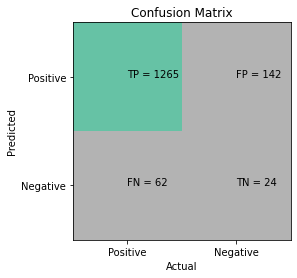

In [ ]:
#Menggunakan Teknik BOW word features
#BOW features adalah teknik ekstraksinya yang populer dan seringkali digunakan saat kita bekerja dengan teks.
# Menampilkan Model BOW
X_train, X_test, y_train, y_test = train_test_split(bow_word_feature, target_variable, test_size=0.3, random_state=272)
naive_model(X_train, X_test, y_train, y_test)

TF-IDF word features

Accuracy Score - 0.8613529805760214


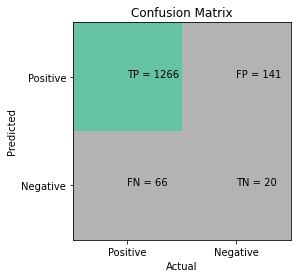

In [ ]:
# Menggunakan Teknik IDF word features
# Menampilkan model sebagai dataframe 
X_train, X_test, y_train, y_test = train_test_split(tfidf_word_feature, target_variable, test_size=0.3, random_state=272)
naive_model(X_train, X_test, y_train, y_test)